# 1. Exploratory Data Analysis (EDA)

### Data Creation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a sample climate dataset
np.random.seed(42)
years = np.arange(2000, 2021)
temperature = np.random.normal(loc=15, scale=2, size=len(years)) + np.linspace(0, 2, len(years))  # Simulated temperature rise
co2_levels = np.random.normal(loc=400, scale=10, size=len(years)) + np.linspace(0, 10, len(years))  # Simulated CO2 increase
sea_level = np.random.normal(loc=0, scale=0.5, size=len(years)) + np.linspace(0, 0.2, len(years))  # Simulated sea level rise

# Creating a DataFrame
climate_data = pd.DataFrame({
    'Year': years,
    'Temperature': temperature,
    'CO2_Levels': co2_levels,
    'Sea_Level': sea_level
})

print(climate_data.head())

   Year  Temperature  CO2_Levels  Sea_Level
0  2000    15.993428  397.742237  -0.057824
1  2001    14.823471  401.175282  -0.140552
2  2002    16.495377  386.752518  -0.719261
3  2003    18.346060  396.056173  -0.329922
4  2004    14.931693  403.109226  -0.190319


In [5]:
climate_data

,Year,Temperature,CO2_Levels,Sea_Level
0,2000,15.993428,397.742237,-0.057824
1,2001,14.823471,401.175282,-0.140552
2,2002,16.495377,386.752518,-0.719261
3,2003,18.346060,396.056173,-0.329922
4,2004,14.931693,403.109226,-0.190319
5,2005,15.031726,390.990064,0.578561
6,2006,18.758426,406.756980,0.231809
7,2007,17.234869,397.493613,-0.811520
8,2008,14.861051,401.083063,0.242042
9,2009,16.985120,398.482934,-0.102541


## EDA and Visualization

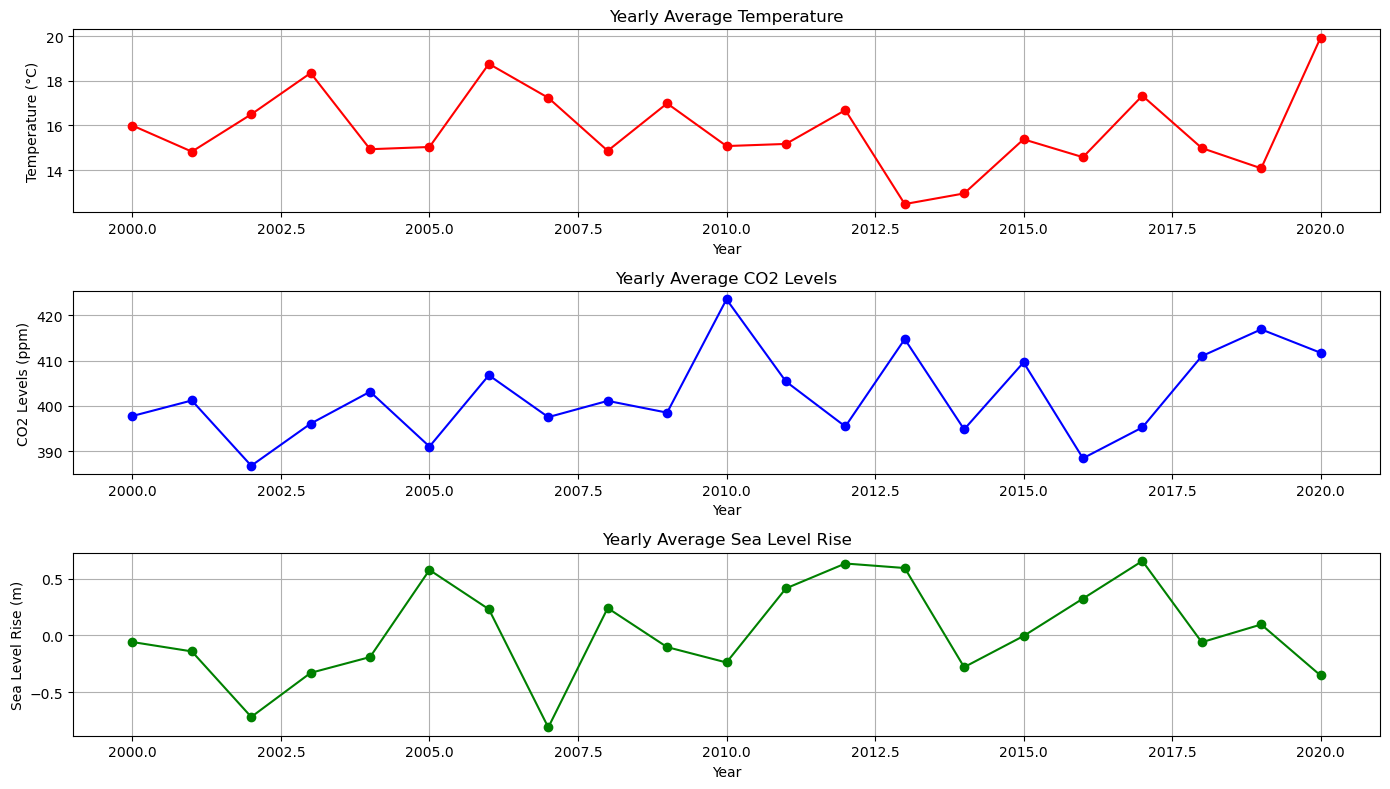

In [8]:
# Visualizing the climate data
plt.figure(figsize=(14, 8))

# Temperature over the years
plt.subplot(3, 1, 1)
plt.plot(climate_data['Year'], climate_data['Temperature'], marker='o', color='red')
plt.title('Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# CO2 Levels over the years
plt.subplot(3, 1, 2)
plt.plot(climate_data['Year'], climate_data['CO2_Levels'], marker='o', color='blue')
plt.title('Yearly Average CO2 Levels')
plt.xlabel('Year')
plt.ylabel('CO2 Levels (ppm)')
plt.grid(True)

# Sea Level Rise over the years
plt.subplot(3, 1, 3)
plt.plot(climate_data['Year'], climate_data['Sea_Level'], marker='o', color='green')
plt.title('Yearly Average Sea Level Rise')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (m)')
plt.grid(True)

plt.tight_layout()
plt.show()

## 2. Correlation Analysis

#### This helps identify how different climate variables relate to each other.

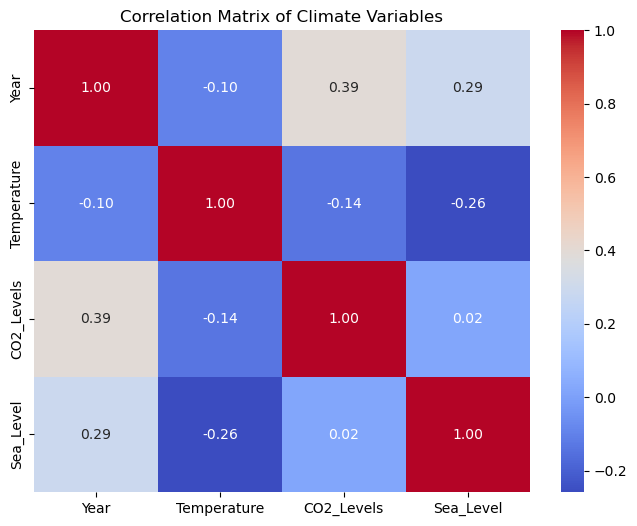

In [12]:
# Correlation matrix
correlation_matrix = climate_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Climate Variables')
plt.show()

## 3. Time Series Forecasting

### We can use time series analysis to predict future temperatures.

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


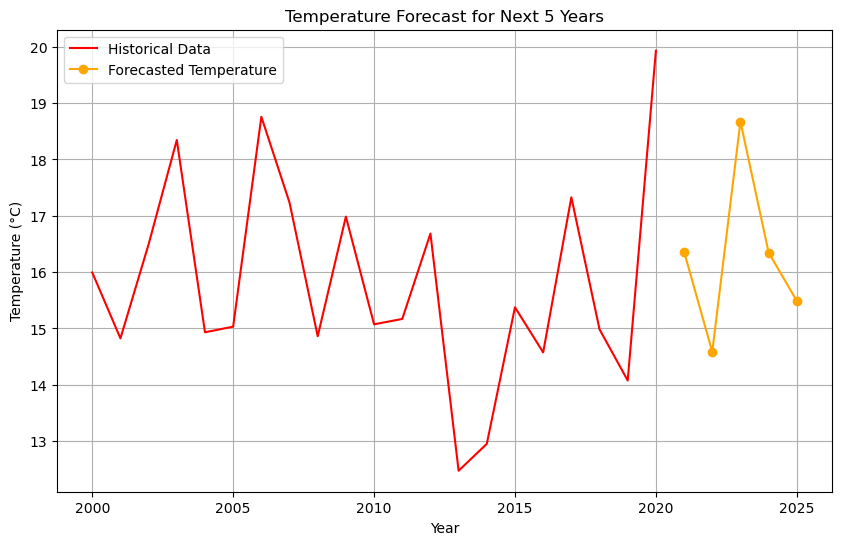

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model for temperature prediction
model = ARIMA(climate_data['Temperature'], order=(2, 1, 2))
model_fit = model.fit()

# Make predictions for the next 5 years
forecast = model_fit.forecast(steps=5)
forecast_years = np.arange(2021, 2026)

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(climate_data['Year'], climate_data['Temperature'], label='Historical Data', color='red')
plt.plot(forecast_years, forecast, label='Forecasted Temperature', marker='o', color='orange')
plt.title('Temperature Forecast for Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Regression Analysis

### We can use regression analysis to model the impact of CO2 levels on temperature.

Coefficients: [-0.02104837]
Mean Squared Error: 0.806082203337733
R-squared: 0.06547489698643838


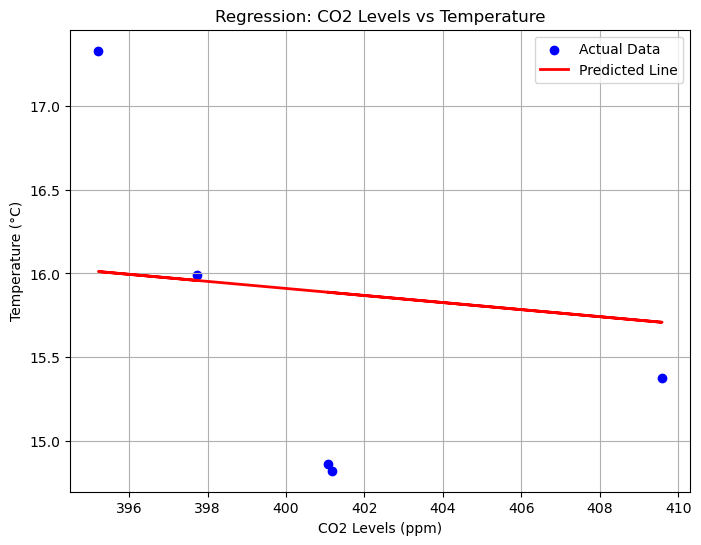

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for regression
X = climate_data[['CO2_Levels']]
y = climate_data['Temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Model evaluation
print(f"Coefficients: {reg_model.coef_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Predicted Line', linewidth=2)
plt.title('Regression: CO2 Levels vs Temperature')
plt.xlabel('CO2 Levels (ppm)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# 5. Classification

#### If we want to classify regions based on their risk levels to climate change, we could use a classification model.

In [24]:
# Creating a sample classification dataset for climate risk
risk_data = pd.DataFrame({
    'CO2_Levels': np.random.uniform(350, 450, 100),
    'Temperature': np.random.uniform(10, 25, 100),
    'Sea_Level': np.random.uniform(0, 2, 100),
    'Risk_Level': np.random.choice(['Low', 'Medium', 'High'], 100)  # Random classification
})

# Encoding the target variable
risk_data['Risk_Level'] = risk_data['Risk_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the features and target variable
X_risk = risk_data[['CO2_Levels', 'Temperature', 'Sea_Level']]
y_risk = risk_data['Risk_Level']

# Split the data into training and testing sets
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(X_risk, y_risk, test_size=0.2, random_state=42)

# Fit the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_risk, y_train_risk)

# Predictions
y_pred_risk = dt_classifier.predict(X_test_risk)

# Model evaluation
print(confusion_matrix(y_test_risk, y_pred_risk))
print(classification_report(y_test_risk, y_pred_risk))

[[6 3 1]
 [2 2 0]
 [2 2 2]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.29      0.50      0.36         4
           2       0.67      0.33      0.44         6

    accuracy                           0.50        20
   macro avg       0.52      0.48      0.47        20
weighted avg       0.56      0.50      0.51        20



# Summary of Analysis Techniques for Climate Change

Exploratory Data Analysis (EDA): Visualized key climate variables over time.

Correlation Analysis: Assessed relationships between different climate factors.

Time Series Forecasting: Used ARIMA to predict future temperatures

Regression Analysis: Modeled the impact of CO2 levels on temperature using linear regression.
    
Classification: Applied a decision tree classifier to classify regions based on climate risk.